In [15]:
from ema_workbench import load_results
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

results = pd.read_csv('./Optimizationresults 100K.csv')

#outcomes = results[["A.1 Total Costs", "A.1_Expected Number of Deaths", "A.2 Total Costs", "A.2_Expected Number of Deaths", "A.3 Total Costs", "A.3_Expected Number of Deaths", "A.4 Total Costs", "A.4_Expected Number of Deaths", "A.5 Total Costs", "A.5_Expected Number of Deaths", "RfR Total Costs", "Expected Evacuation Costs"]]
y = (results['A.1_Expected Number of Deaths'] <= 0) & (results['A.2_Expected Number of Deaths'] <= 0.00148) & (results['A.3_Expected Number of Deaths'] <= 0.001) & (results['A.1_DikeIncrease 0'] <= 0) & (results['A.1_DikeIncrease 1'] <= 0) & (results['A.1_DikeIncrease 2'] <= 0) & (results['A.2_DikeIncrease 0'] <= 0) & (results['A.2_DikeIncrease 1'] <= 0) & (results['A.2_DikeIncrease 2'] <= 0) & (results['A.3_DikeIncrease 0'] <= 0) & (results['A.3_DikeIncrease 1'] <= 0) & (results['A.3_DikeIncrease 2'] <= 0) & (results['A.4_DikeIncrease 0'] <= 0) & (results['A.4_DikeIncrease 1'] <= 0) & (results['A.4_DikeIncrease 2'] <= 0) & (results['A.5_DikeIncrease 0'] <= 0) & (results['A.5_DikeIncrease 1'] <= 0) & (results['A.5_DikeIncrease 2'] <= 0) 
y.value_counts()



False    1227
dtype: int64

In [20]:
from __future__ import (unicode_literals, print_function, absolute_import,
                        division)


from ema_workbench import (Model, MultiprocessingEvaluator, Policy,
                           Scenario, IntegerParameter)
from ema_workbench.em_framework.evaluators import BaseEvaluator

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from ema_workbench import load_results
from ema_workbench.analysis import prim


In [21]:
results = load_results('./SECOND candidate solutions MORDM 1000scenarios.tar.gz')

x, outcomes = results

outcomesdf = pd.DataFrame.from_dict(outcomes)

In [22]:
y = (outcomesdf['RfR Total Costs'] <= 0) & (outcomesdf['A.1_Expected Number of Deaths'] <= 0) & (outcomesdf['A.2_Expected Number of Deaths'] <= 0.00148) & (outcomesdf['A.3_Expected Number of Deaths'] <= 0.001)

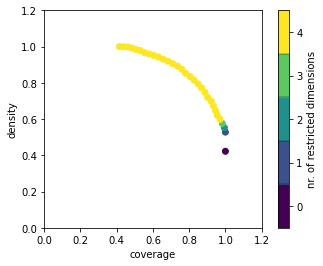

In [26]:
prim_obj = prim.Prim(x, y, mass_min=0.05, threshold=0.1, peel_alpha=0.05)
box = prim_obj.find_box()

box.show_tradeoff()
plt.show()

/Users/josefiendewind/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


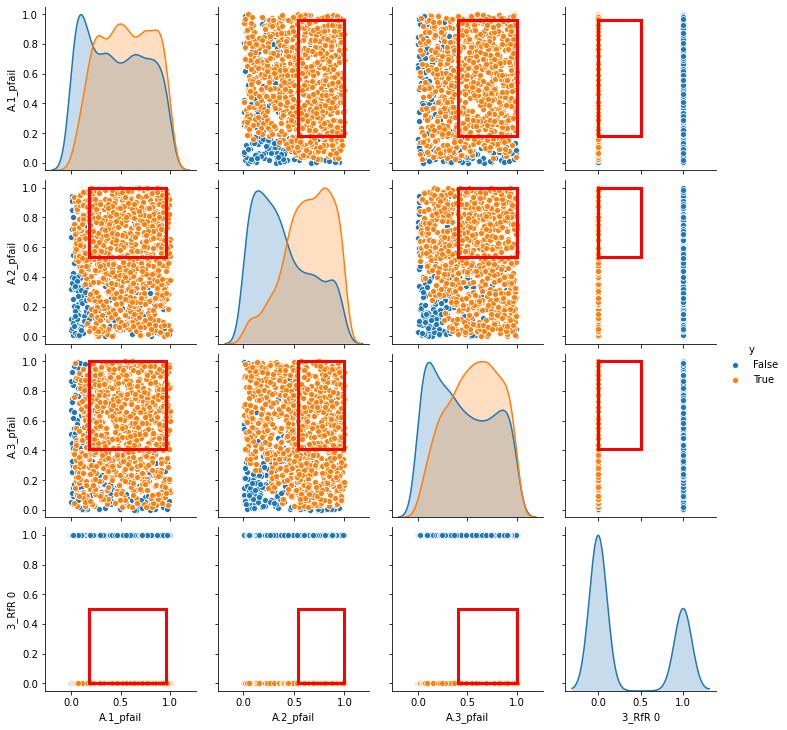

In [54]:
box.show_pairs_scatter(30)
plt.show()

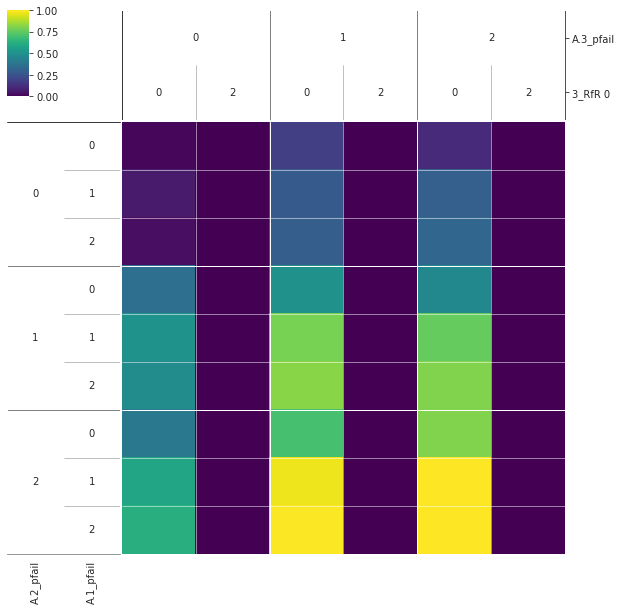

<Figure size 432x288 with 0 Axes>

In [57]:
from ema_workbench.analysis import dimensional_stacking

dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()
plt.savefig('dimensional stacking.png')